I used the Titanic dataset and all questions and findings pertain to it.


# Questions regarding data set

Did the following factors influence survival? - namely passenger class, sex and age. If so, how?

Is there a relationship between those who survived and those who had other relations traveling with them?

# My approach that led to the findings -

After importing the data set, I looked at the first few rows to understand the content. I also looked at the description of the column names to understand how the data was presented.
I was interested in doing a comparison between those who survived and those who didn't. To begin with, I wanted to look at some basic statistics, such as what was the mean age of the passengers, how many more males there were than females etc and then look at those characteristics in the proportion who survived.

Next I wanted to understand the correlation between the survived variable and the rest of the variables using Pearson's coefficient to determine if there were any strong positive or negative correlation between them.

Based on my findings, I plotted a few graphs from which I was able to confirm the findings graphically.

# Report of findings

-Average age of passengers who died is about 30 years old (29.6). Median is about 30 as well. 75th percentile is only 38. In other words, 75% of the passengers who survived (which is 342 based on available data) were equal to or younger than 38 years old. So it is safe to assume that those who survived were fairly young.

- Looking at the proportion of passengers in each class who survived, we can see that 63% of 1st class passengers survived compared to only 24% of 3rd class. About half of 2nd class survived (47.3%). Looking at the correlation between Pclass and survived - about -0.34 : This negative correlation albeit weak indicates that there were more survivors as the passenger class decreased (i.e 3rd class passengers to 1st class passengers). This indicates that perhaps 1st class passengers were prioritized over others although there maybe several reasons why (lifeboat proximity perhaps would be an innocent guess).

- By a similar analysis, we can see that there were more female survivors (74.2%) than male survivors (18.9%). Although, we still need to dig deeper to understand how many children there were that contributed to this number but given that there is a wide margin between the two proportions, it is safe to assume that women (and possibly) children were possibly prioritized over the male passengers.




In [19]:
# Python code supporting findings



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('titanic-data.csv')

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df['Survived'].sum()


342

In [5]:
A = pd.Series(titanic_df['Pclass'].value_counts())
 
    

B = pd.Series(titanic_df.groupby('Pclass').sum()['Survived'])
print (B)

survival_prop_by_pclass = B/A
print (survival_prop_by_pclass)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
1    0.629630
2    0.472826
3    0.242363
dtype: float64


In [13]:
C = titanic_df['Sex'].value_counts()

D = titanic_df.groupby('Sex').sum()['Survived']
survival_prop_by_sex = D/C
print(survival_prop_by_sex)

female    0.742038
male      0.188908
dtype: float64


In [7]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
len(titanic_df)

891

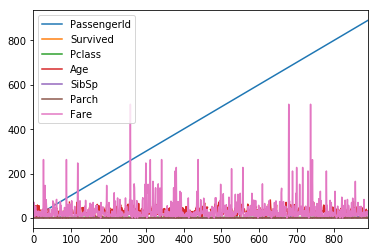

In [9]:
titanic_df.plot()
plt.show()


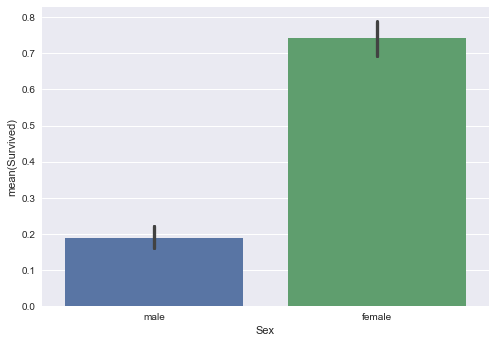

In [21]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.show()


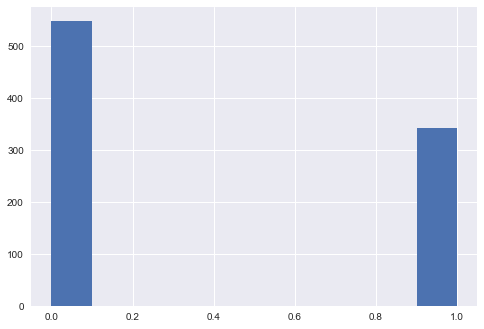

In [23]:
titanic_df['Survived'].hist()
plt.show()

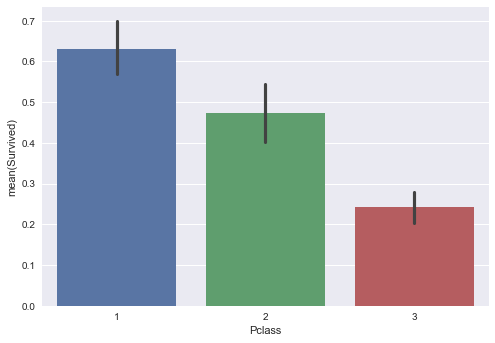

In [22]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)
plt.show()

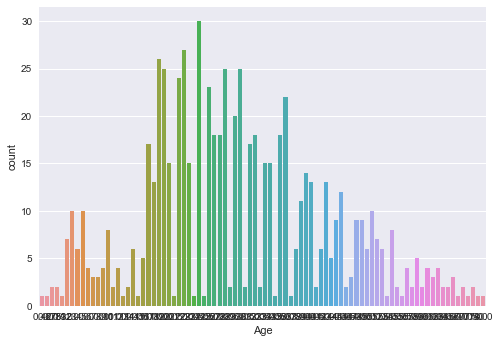

In [36]:
sns.countplot(x='Age',data=titanic_df)
plt.show()

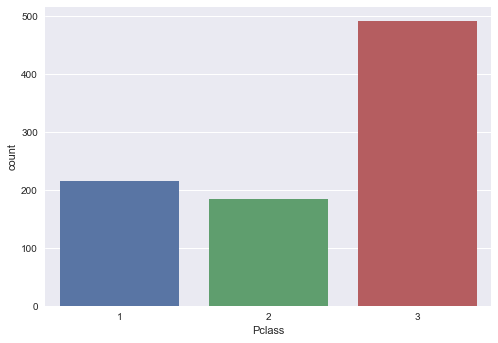

In [25]:
sns.countplot(x='Pclass',data=titanic_df)
plt.show()